In [2]:
import numpy            as np
import matplotlib.pyplot as plt

# $$ --------------\\
Weighted~Network$$

Ich habe noch zwei Hinweise
<ul>
 <li> Zur Berechnung der Betweenness und Closeness wurde der "klassische" Ansatz verwendet, die reziproken Gewichte anzunehmen.
 <li> Die Knoten-Gewichte sind als dict gespeichert worden und werden damit etwas abweichend ausgelesen. Wenn statt des Gesamtgewichts nur die In- bzw. Out-Komponente betrachtet werden soll, dann muss "total" durch "in", bzw. "out" in Zeile 22 ersetzt werden.
</lu>

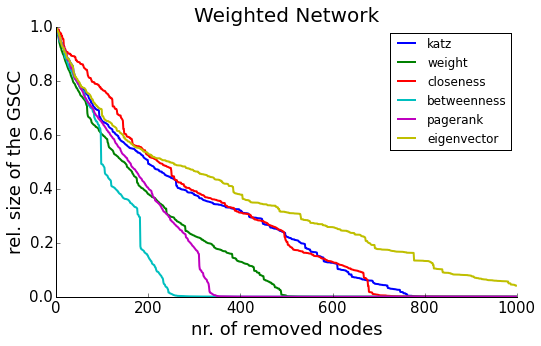

In [36]:
%matplotlib inline
centrality = {"weight": "data/weighted_weight",
              "closeness": "data/weighted_closeness",
              "betweenness": "data/weighted_betweenness",
              "katz": "data/weighted_katz",
              "eigenvector": "data/weighted_eigenvector",
              "pagerank": "data/weighted_pagerank"}

fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0.15,0.15,0.8,0.75])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Weighted Network',{'size':20})

for cen in centrality.keys():
    result = np.load(centrality[cen]+".npz")
    if cen == "weight":
        size = result['size'].item()['total'].astype(float)
        size /= size[0]
        N = len(size)
    else:
        N = result['N']
        size = 1.*result['size'][0:N]/result['size'][0]
    ax.plot(range(N),size,linewidth=2)
plt.legend(centrality, loc='upper right')
plt.xlabel('nr. of removed nodes',{'size':18})
plt.ylabel('rel. size of the GSCC',{'size':18})
plt.savefig('data/weighted_targeted_attack',format='png')

# $$ --------------\\
Unweighted~Network$$

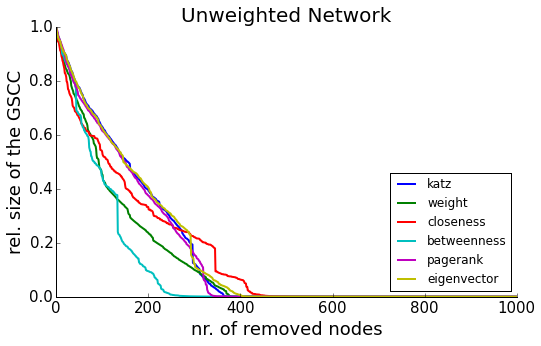

In [37]:
%matplotlib inline
centrality = {"weight": "data/unweighted_degree",
              "closeness": "data/unweighted_closeness",
              "betweenness": "data/unweighted_betweenness",
              "katz": "data/unweighted_katz",
              "eigenvector": "data/unweighted_eigenvector",
              "pagerank": "data/unweighted_pagerank"}

fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0.15,0.15,0.8,0.75])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Unweighted Network',{'size':20})

for cen in centrality.keys():
    result = np.load(centrality[cen]+".npz")
    if cen == "weight":
        size = result['size'].item()['total'].astype(float)
        size /= size[0]
        N = len(size)
    else:
        N = result['N']
        size = 1.*result['size'][0:N]/result['size'][0]
    ax.plot(range(N),size,linewidth=2)
plt.legend(centrality, loc='lower right')
plt.xlabel('nr. of removed nodes',{'size':18})
plt.ylabel('rel. size of the GSCC',{'size':18})
plt.savefig('data/unweighted_targeted_attack',format='png')

#$$ ---------------\\
Vergleich~mit~Log-Gewichtung $$

An dieser Stelle noch ein Vergleich mit der logarithmischen Gewichtung, die Dirk Brockmann in seinem Science-Artikel verwendet hat.

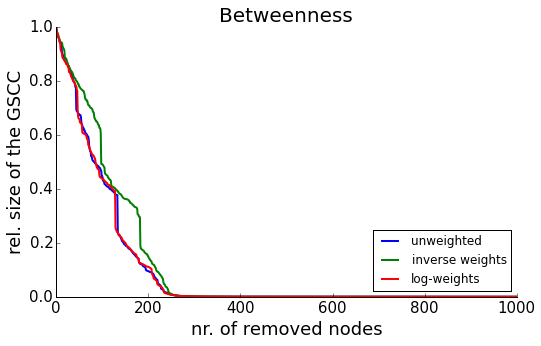

In [44]:
%matplotlib inline
centrality = {"unweighted": "data/unweighted_betweenness",
              "inverse weights": "data/weighted_betweenness",
              "log-weights": "data/weighted_betweenness_brockmann"}

fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0.15,0.15,0.8,0.75])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for cen in centrality.keys():
    size = np.load(centrality[cen]+".npz")['size'].astype(float)
    size /= size[0]
    ax.plot(range(len(size)),size,linewidth=2)
plt.title('Betweenness',{'size':20})
plt.legend(centrality, loc='lower right')
plt.xlabel('nr. of removed nodes',{'size':18})
plt.ylabel('rel. size of the GSCC',{'size':18})
plt.savefig('compare_betweenness',format='png')

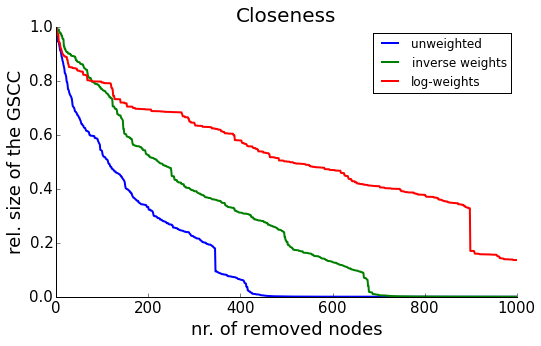

In [46]:
%matplotlib inline
centrality = {"unweighted": "data/unweighted_closeness",
              "inverse weights": "data/weighted_closeness",
              "log-weights": "data/weighted_closeness_brockmann"}

fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0.15,0.15,0.8,0.75])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for cen in centrality.keys():
    size = np.load(centrality[cen]+".npz")['size'].astype(float)
    size /= size[0]
    ax.plot(range(len(size)),size,linewidth=2)
plt.title('Closeness',{'size':20})
plt.legend(centrality, loc='upper right')
plt.xlabel('nr. of removed nodes',{'size':18})
plt.ylabel('rel. size of the GSCC',{'size':18})
plt.savefig('compare_closeness',format='png')